# WOW

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sms
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [2]:
df = pd.read_csv('./wowah_data.csv')
df1 = pd.read_csv('./zones.csv')
df2 = pd.read_csv('./locations.csv')
df3 = pd.read_csv('./location_coords.csv', encoding = "latin")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10826734 entries, 0 to 10826733
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   char        int64 
 1    level      int64 
 2    race       object
 3    charclass  object
 4    zone       object
 5    guild      int64 
 6    timestamp  object
dtypes: int64(3), object(4)
memory usage: 578.2+ MB


In [4]:
# removing those spaces in the columns names !
# df.columns
df.rename({' level':'level',' zone':'zone' , ' race': 'race', ' charclass': 'charclass', ' guild': 'guild', ' timestamp': 'timestamp'}, axis = 1, inplace=True)

In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'])

##### Lets find what race, class, and race/class combination is more popular inthe game

##### Our dataframe shows the characters and their information. Each character has a unique character_id(char). With the progress of time, these characters develop and their levels increase. For most of our analysis, we use the last time that a character was spotted on the map.

In [6]:
dft = df.sort_values(by='timestamp')

### What class and what race are the most popular ?

In [7]:
uniques = dft.drop_duplicates('char', keep = 'last', ignore_index=True)
uniques

char  level       race     charclass                 zone  guild  \
0      37059     41  Blood Elf       Warlock            Undercity    186   
1      65389      6     Undead       Warrior              Durotar     -1   
2      65552      2  Blood Elf          Mage       Eversong Woods     -1   
3      65073      9  Blood Elf       Paladin       Eversong Woods     -1   
4      65501      7  Blood Elf       Paladin      Silvermoon City     -1   
...      ...    ...        ...           ...                  ...    ...   
37349  88004     80  Blood Elf  Death Knight             Icecrown    135   
37350  86517     80  Blood Elf  Death Knight            Undercity    115   
37351  86679     80  Blood Elf  Death Knight  Eastern Plaguelands    459   
37352  86851     80  Blood Elf  Death Knight       Halls of Stone    103   
37353  86457     80  Blood Elf  Death Knight         Dragonblight    204   

                timestamp  
0     2008-01-01 00:15:00  
1     2008-01-01 00:43:55  
2     2008-01-01 00:44:40  
3     2008-01-01 01:14:48  
4     2008-01-01 01:14:48  
...                   ...  
37349 2008-12-31 23:50:18  
37350 2008-12-31 23:50:18  
37351 2008-12-31 23:50:18  
37352 2008-12-31 23:50:18  
37353 2008-12-31 23:50:18  

[37354 rows x 7 columns]

In [8]:
pop = uniques['race'].value_counts()
pop1 = uniques['charclass'].value_counts()

([<matplotlib.patches.Wedge at 0x27d7a459ea0>,
 [Text(0.8866885049723799, 0.6509865552757953, 'Warrior'),
  Text(-0.11432494113544764, 1.0940428729416305, 'Hunter'),
  Text(-0.8645197288017852, 0.6801511879813841, 'Rogue'),
  Text(-1.0974986646370732, -0.07413960560888685, 'Mage'),
  Text(-0.8135437786392823, -0.740369178340994, 'Warlock'),
  Text(-0.2647394592651526, -1.0676670917041484, 'Paladin'),
  Text(0.29141219873854, -1.0606973792870282, 'Shaman'),
  Text(0.744533141714545, -0.8097347719399665, 'Priest'),
  Text(0.9932344491563684, -0.4727423494981657, 'Druid'),
  Text(1.0887628536625293, -0.1568293610413105, 'Death Knight')],
 [Text(0.48364827543947986, 0.3550835756049792, '20.16'),
  Text(-0.06235905880115325, 0.5967506579681621, '13.00'),
  Text(-0.47155621571006456, 0.3709915570807549, '12.47'),
  Text(-0.5986356352565853, -0.040439784877574644, '10.90'),
  Text(-0.44375115198506304, -0.40383773364054215, '10.46'),
  Text(-0.14440334141735595, -0.5823638682022627, '8.30'),


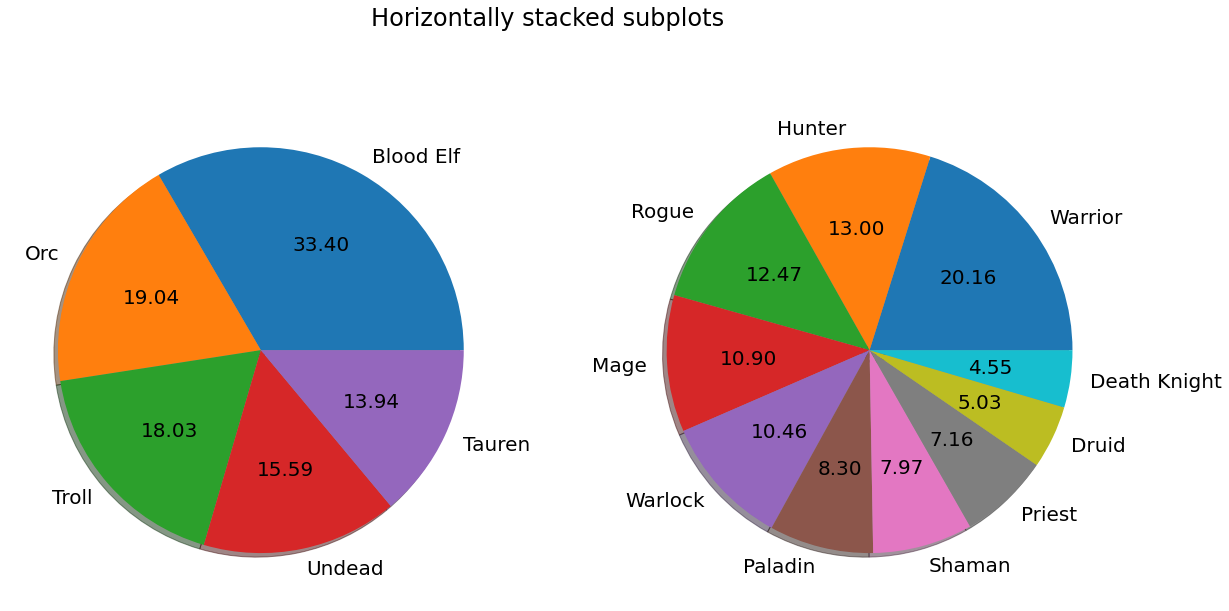

In [9]:
plt.rcParams.update({'font.size':20})

# fig, ax = plt.subplots(figsize=(12,4))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
fig.suptitle('Horizontally stacked subplots')
ax1.pie(pop, labels = pop.index, shadow = True, autopct='%.2f')
ax2.pie(pop1, labels = pop1.index, shadow = True, autopct='%.2f')

# plt.pie(pop, labels = pop.index, shadow = True)

##### we use hexcolors (rgba colors) that are consistent with the identification

In [10]:
dict_color = {'Death Knight': '#C41F3B',
                'Shaman': '#0070DE',
                'Druid': '#FF7D0A',
                'Rogue': '#FFF569',
                'Priest': '#FFFFFF',
                'Paladin': '#F58CBA',
                'Warrior': '#C79C6E',
                'Warlock': '#8787ED',
                'Mage': '#40C7EB',
                'Hunter': '#A9D271'}

In [11]:
preplot = uniques.groupby(['race','charclass']).count()['char'].reset_index()

#### Plot of the class/race combination

In [12]:
fig = px.bar(preplot, x='race', y='char',
             hover_data=['race', 'char'], color = 'charclass',  color_discrete_map =  dict_color,
             labels={'char':'Character Race Population', 'charclass': 'Character Class', 'rece' : 'Character Race'}, height=500)

# fig.add_trace(go.Scatter(
#     x=['Orc', 'Troll', 'Tauren', 'Undead', 'Blood Elf'],
#     y=[1000000, 1200000, 2500000, 2700000, 4000000],
#     text=pd.DataFrame(tmp['char_%'].round(1).astype(str) + '%')['char_%'].values,
#     mode="text",
# ))

fig.show()

#### most popular class/race combination

In [13]:
uniques['class_race'] = uniques['race'] + ' ' + uniques['charclass']

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\790294949.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<BarContainer object of 31 artists>

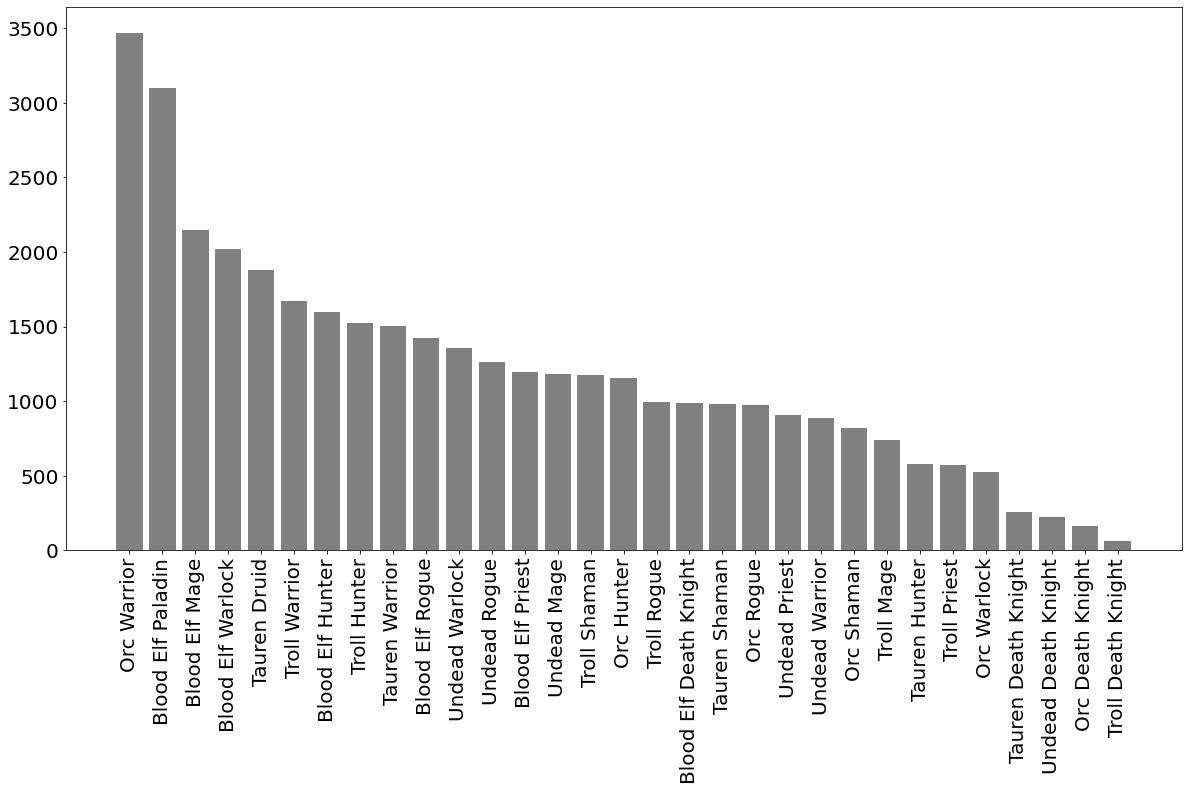

In [14]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.bar(uniques['class_race'].value_counts().index, height=uniques['class_race'].value_counts().values, color = 'grey')
# figsize=(20, 10)
# plt.xticks

In [15]:
uniques ['timestamp'] = pd.to_datetime(uniques['timestamp'])

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\3777555809.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
Dataplot = pd.DataFrame(uniques.groupby(['timestamp', 'race']).count()['char']).reset_index().sort_values(by = 'timestamp')
Dataplot['date'] = pd.DatetimeIndex(Dataplot['timestamp']).normalize()
Dat = Dataplot.groupby(['date', 'race']).count().reset_index()
Dat.head(10)
# df['date'] = pd.DatetimeIndex(df['timestamp']).normalize()

date       race  timestamp  char
0 2008-01-01  Blood Elf         26    26
1 2008-01-01        Orc         11    11
2 2008-01-01     Tauren          8     8
3 2008-01-01      Troll          6     6
4 2008-01-01     Undead         13    13
5 2008-01-02  Blood Elf         16    16
6 2008-01-02        Orc         12    12
7 2008-01-02     Tauren         13    13
8 2008-01-02      Troll          8     8
9 2008-01-02     Undead          7     7

#### Characters spotted on map on each day

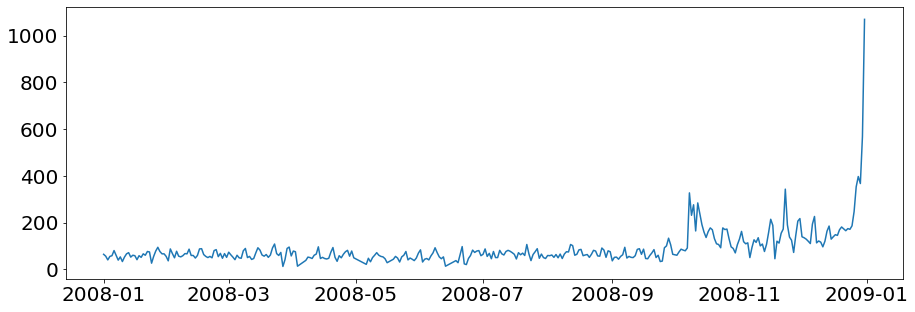

In [17]:
# characters spotted / day
# upon release there were over 1500 characters created by players, as time passed, many of the initial characters were
# abandoned by the users and only a few of them were consistently spotted on the map.
# after each update (Burning Crusade and WOTLK), again many characters were created and spotted on the map, but again ...
Dat3 = Dat.groupby('date').sum().reset_index()
fig = plt.figure(figsize=(15,5))
plt.plot(Dat3.date, Dat3.char)

In [18]:
Dat4 = uniques.copy()
Dat4['date'] = pd.DatetimeIndex(Dat4['timestamp']).normalize()
Dat4plot = Dat4.groupby

#### Evolution of race & class population

In [19]:
Dataplot = pd.DataFrame(uniques.groupby(['timestamp', 'charclass']).count()['char']).reset_index().sort_values(by = 'timestamp')
Dataplot['date'] = pd.DatetimeIndex(Dataplot['timestamp']).normalize()
Dat2 = Dataplot.groupby(['date', 'charclass']).count().reset_index()


In [20]:
Dataplot = pd.DataFrame(uniques.groupby(['timestamp', 'race']).count()['char']).reset_index().sort_values(by = 'timestamp')

fig = px.line(Dat, x="date", y="char", color='race',
             hover_data=['race'], 
             color_discrete_map =  dict_color,
             labels={'char':'Race Population', 'charclass' : 'Class', 'pers' : 'Race Population Percentage', 'race' : 'Race'}, height=400)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=250,
            line=dict(
                color="Black",
                width=2
            )))
fig.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
        y=[130, 130],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

Dataplot = pd.DataFrame(uniques.groupby(['timestamp', 'race']).count()['char']).reset_index().sort_values(by = 'timestamp')

fig2 = make_subplots(rows=3, cols=1)

fig2 = px.line(Dat2, x="date", y="char", color='charclass',
             hover_data=['charclass', 'char'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'pers' : 'Race Population Percentage', 'race' : 'Race'}, height=400)

fig2.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=250,
            line=dict(
                color="Black",
                width=2
                            )))
fig2.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[180, 180],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))
# fig = go.Figure(layout=layout)
# iplot(fig)
# layout = go.Layout(yaxis=dict(range=[-4,200]), title='y Axis')
fig.update_layout(yaxis_range=[-0,250])
fig2.update_layout(yaxis_range=[-0,250])
fig.show()
fig2.show()

#### Lets see how important guilds are to the community of wow

In [21]:
Dat5 = uniques.groupby(['guild', 'race', 'charclass']).count().reset_index()
Dat5

guild       race     charclass  char  level  zone  timestamp  class_race
0        -1  Blood Elf  Death Knight   669    669   669        669         669
1        -1  Blood Elf        Hunter  1221   1221  1221       1221        1221
2        -1  Blood Elf          Mage  1659   1659  1659       1659        1659
3        -1  Blood Elf       Paladin  2282   2282  2282       2282        2282
4        -1  Blood Elf        Priest   855    855   855        855         855
...     ...        ...           ...   ...    ...   ...        ...         ...
2811    507     Undead       Warlock     1      1     1          1           1
2812    508  Blood Elf  Death Knight     2      2     2          2           2
2813    508  Blood Elf          Mage     1      1     1          1           1
2814    508  Blood Elf       Paladin     1      1     1          1           1
2815    508  Blood Elf       Warlock     1      1     1          1           1

[2816 rows x 8 columns]

In [22]:
Dat5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   guild       2816 non-null   int64 
 1   race        2816 non-null   object
 2   charclass   2816 non-null   object
 3   char        2816 non-null   int64 
 4   level       2816 non-null   int64 
 5   zone        2816 non-null   int64 
 6   timestamp   2816 non-null   int64 
 7   class_race  2816 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 176.1+ KB


In [23]:
Dat5['guild'].value_counts()

-1      31
 103    31
 189    30
 101    30
 104    30
        ..
 436     1
 435     1
 217     1
 432     1
 301     1
Name: guild, Length: 409, dtype: int64

In [24]:
Dat5mapped = Dat5.copy()
Dat5mapped['guildbool'] = np.nan
j = 0
for i in Dat5['guild'].values:
    if i < 0:
        Dat5mapped['guildbool'][j] = 'no guild'
    else:
        Dat5mapped['guildbool'][j] = 'guilded'
    j +=1
Dat5mapped

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\885190514.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



guild       race     charclass  char  level  zone  timestamp  \
0        -1  Blood Elf  Death Knight   669    669   669        669   
1        -1  Blood Elf        Hunter  1221   1221  1221       1221   
2        -1  Blood Elf          Mage  1659   1659  1659       1659   
3        -1  Blood Elf       Paladin  2282   2282  2282       2282   
4        -1  Blood Elf        Priest   855    855   855        855   
...     ...        ...           ...   ...    ...   ...        ...   
2811    507     Undead       Warlock     1      1     1          1   
2812    508  Blood Elf  Death Knight     2      2     2          2   
2813    508  Blood Elf          Mage     1      1     1          1   
2814    508  Blood Elf       Paladin     1      1     1          1   
2815    508  Blood Elf       Warlock     1      1     1          1   

      class_race guildbool  
0            669  no guild  
1           1221  no guild  
2           1659  no guild  
3           2282  no guild  
4            855  no guild  
...          ...       ...  
2811           1   guilded  
2812           2   guilded  
2813           1   guilded  
2814           1   guilded  
2815           1   guilded  

[2816 rows x 9 columns]

In [25]:
Dat5plot = Dat5mapped.groupby('guildbool').count().reset_index()


fig = px.bar(Dat5plot, x="guildbool", y="char", color = ['r', 'b'],
#              hover_data=['race'],
#              color_discrete_map =  dict_color,
             labels={'char':'Race Population', 'charclass' : 'Class', 'pers' : 'Race Population Percentage', 'race' : 'Race'}, height=400)


Dataplot = pd.DataFrame(uniques.groupby(['timestamp', 'race']).count()['char']).reset_index().sort_values(by = 'timestamp')

fig2 = make_subplots(rows=3, cols=1)

fig2 = px.histogram(Dat5, x="guild", y="char", color='charclass',
             hover_data=['charclass', 'char'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'pers' : 'Race Population Percentage', 'race' : 'Race'}, height=400)

fig2.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=250,
            line=dict(
                color="Black",
                width=2
                            )))
fig2.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[180, 180],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))
# fig = go.Figure(layout=layout)
# iplot(fig)
# layout = go.Layout(yaxis=dict(range=[-4,200]), title='y Axis')
# fig.update_layout(yaxis_range=[-0,30])
# fig.update_layout(xaxis_range=[-500,500])
fig2.update_layout(yaxis_range=[-0,1500])
# fig.update_coloraxes(showscale=False)
fig.update_traces(showlegend=False)
fig.show()
fig2.show()

In [26]:
Dat5

guild       race     charclass  char  level  zone  timestamp  class_race
0        -1  Blood Elf  Death Knight   669    669   669        669         669
1        -1  Blood Elf        Hunter  1221   1221  1221       1221        1221
2        -1  Blood Elf          Mage  1659   1659  1659       1659        1659
3        -1  Blood Elf       Paladin  2282   2282  2282       2282        2282
4        -1  Blood Elf        Priest   855    855   855        855         855
...     ...        ...           ...   ...    ...   ...        ...         ...
2811    507     Undead       Warlock     1      1     1          1           1
2812    508  Blood Elf  Death Knight     2      2     2          2           2
2813    508  Blood Elf          Mage     1      1     1          1           1
2814    508  Blood Elf       Paladin     1      1     1          1           1
2815    508  Blood Elf       Warlock     1      1     1          1           1

[2816 rows x 8 columns]

In [27]:
a = pd.cut(Dat5[Dat5['guild']>=0]['guild'], 10)
a.values.unique()
dict_ = {}
j = 0
k = ['Tiny', 'Small', 'Medium', 'Large', 'Xlarge', 'XXlarge', 'XXXlarge', 'Huge', 'Gigantic', 'Incredible']
for i in a.values.unique():
    dict_[i] = k[j]
    j +=1
dict_    


{Interval(0.493, 51.7, closed='right'): 'Tiny',
 Interval(51.7, 102.4, closed='right'): 'Small',
 Interval(102.4, 153.1, closed='right'): 'Medium',
 Interval(153.1, 203.8, closed='right'): 'Large',
 Interval(203.8, 254.5, closed='right'): 'Xlarge',
 Interval(254.5, 305.2, closed='right'): 'XXlarge',
 Interval(305.2, 355.9, closed='right'): 'XXXlarge',
 Interval(355.9, 406.6, closed='right'): 'Huge',
 Interval(406.6, 457.3, closed='right'): 'Gigantic',
 Interval(457.3, 508.0, closed='right'): 'Incredible'}

In [28]:
Dat5['guild_size'] = Dat5['guild'].map(dict_)
Dat5.fillna('guildless', inplace = True)

In [29]:
Dat5

guild       race     charclass  char  level  zone  timestamp  \
0        -1  Blood Elf  Death Knight   669    669   669        669   
1        -1  Blood Elf        Hunter  1221   1221  1221       1221   
2        -1  Blood Elf          Mage  1659   1659  1659       1659   
3        -1  Blood Elf       Paladin  2282   2282  2282       2282   
4        -1  Blood Elf        Priest   855    855   855        855   
...     ...        ...           ...   ...    ...   ...        ...   
2811    507     Undead       Warlock     1      1     1          1   
2812    508  Blood Elf  Death Knight     2      2     2          2   
2813    508  Blood Elf          Mage     1      1     1          1   
2814    508  Blood Elf       Paladin     1      1     1          1   
2815    508  Blood Elf       Warlock     1      1     1          1   

      class_race  guild_size  
0            669   guildless  
1           1221   guildless  
2           1659   guildless  
3           2282   guildless  
4            855   guildless  
...          ...         ...  
2811           1  Incredible  
2812           2  Incredible  
2813           1  Incredible  
2814           1  Incredible  
2815           1  Incredible  

[2816 rows x 9 columns]

In [30]:
x= Dat5.groupby(['guild_size', 'race', 'charclass']).count().reset_index()
x1 = x.guild_size.value_counts()
x1

Huge          31
Incredible    31
Large         31
Medium        31
Small         31
XXlarge       31
Xlarge        31
guildless     31
Gigantic      30
Tiny          30
XXXlarge      30
Name: guild_size, dtype: int64

In [31]:
race_class_pop = uniques.groupby('race')['charclass'].value_counts()

In [32]:
# race_class_pop.index[1][1]
def grab_first(df):
    a = list()
    for i in range(len(df.index)):
        if df.index[i][0] not in a:
            a.append(df.index[i][0])
    return a
def grab_second(df):
    a = list()
    for i in range(len(df.index)):
        if df.index[i][1] not in a:
            a.append(df.index[i][1])
    return a

In [33]:
race = uniques.groupby('race')
races = {}
keys = list(dict.fromkeys(grab_first(race_class_pop)))
for i in keys:
    races[i] = race.get_group(i)
    races[i].drop('race', axis = 1, inplace = True)

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\3072847158.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\3072847158.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\3072847158.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\3072847158.py:6: SettingWithCopyWarning:


A v

In [34]:
races.keys()

dict_keys(['Blood Elf', 'Orc', 'Tauren', 'Troll', 'Undead'])

In [35]:
#Added title to the figure 
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Race/Levels")))
fig2 = go.Figure(layout=go.Layout(title= go.layout.Title(text="guilds")))
#change to percent of group rather than raw numbers
fig.add_trace(go.Bar(name= 'Guild size', x= x1.index, y=x1.values))

#added another trace, this is the second series of bars 
fig2.add_trace(go.Bar(name= 'Selection_1', x= races['Blood Elf'].level.value_counts().index, y=races['Blood Elf'].level.value_counts().values/races['Blood Elf'].level.value_counts().values.sum()))
fig2.add_trace(go.Bar(name= 'Selection_2', x= races['Blood Elf'].level.value_counts().index, y=races['Blood Elf'].level.value_counts().values/races['Blood Elf'].level.value_counts().values.sum()))

updatemenus = []
buttons1 = []
buttons2 = []

# =====================================================================================
for i in list(races.keys())[:]:
    buttons1.append(dict(method='restyle',
                        label=i,
                        visible=True,
                        args=[{'x':[races[i].level.value_counts().index],
                               'y':[races[i].level.value_counts().values/races[i].level.value_counts().values.sum()],
                               'type':'bar'}, [0]],))
# =====================================================================================   
for i in list(races.keys())[:]:
    buttons2.append(dict(method='restyle',
                        label=i,
                        visible=True,
                        args=[{'x':[races[i].level.value_counts().index],
                               'y':[races[i].level.value_counts().values/races[i].level.value_counts().values.sum()],
                               'type':'bar'}, [1]],))
# =====================================================================================                        
       
fig.update_layout(title_text='Guild Size',
                  title_x=0.4,
                  width=850,
                  height=650,
                  autosize=True,
                 
updatemenus=[dict(active=0,
#                                    buttons=buttons1,
                                    x=1.15,
                                    y=.8,
                                    xanchor='left',
                                    yanchor='top'),
                              
                               dict(
#                                    buttons=buttons2,
                                    x=1.15,
                                    y=0.6,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

#Add annotations for the two dropdown menus:

updatemenus=[dict(active=0,
                                   buttons=buttons1,
                                    x=1.15,
                                    y=.8,
                                    xanchor='left',
                                    yanchor='top'),
                              
                               dict(
                                   buttons=buttons2,
                                    x=1.15,
                                    y=0.6,
                                    xanchor='left',
                                    yanchor='top')
                              ]
# add dropdown menus to the figure
fig2.update_layout(updatemenus=updatemenus)



#order axes https://plotly.com/python/categorical-axes/
# fig.update(layout_yaxis_range = [0,1])
# fig.update_xaxes(categoryorder= 'array', categoryarray= ["Doctoral degree",'Master’s degree','Bachelor’s degree','Some college/university study without earning a bachelor’s degree',"Professional degree","No formal education past high school","I prefer not to answer"])

# =================================================================================
# Update axes
fig.update_layout(
    yaxis=dict(
        anchor="x",
        autorange=False,
        domain=[0, 1],
        linecolor="#673ab7",
        mirror=True,
        range=[0,40],
        showline=True,
        side="right",
        tickfont={"color": "#673ab7"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#673ab7"},
        type="linear",
        zeroline=False
    ))
# =================================================================================
# fig.update_yaxes(autorange=False)
fig.show()
fig2.show()

In [36]:
# Dat5[Dat5['level']==80]
uniques[uniques.level==80]

char  level       race     charclass                    zone  guild  \
29617  70478     80  Blood Elf        Hunter           Borean Tundra     79   
29716  41668     80  Blood Elf          Mage                Icecrown    103   
29909  68544     80     Tauren       Warrior               Orgrimmar     79   
29958  86337     80     Tauren  Death Knight  Strand of the Ancients    189   
30410  15465     80      Troll          Mage                 Dalaran    103   
...      ...    ...        ...           ...                     ...    ...   
37349  88004     80  Blood Elf  Death Knight                Icecrown    135   
37350  86517     80  Blood Elf  Death Knight               Undercity    115   
37351  86679     80  Blood Elf  Death Knight     Eastern Plaguelands    459   
37352  86851     80  Blood Elf  Death Knight          Halls of Stone    103   
37353  86457     80  Blood Elf  Death Knight            Dragonblight    204   

                timestamp              class_race  
29617 2008-12-03 16:57:03        Blood Elf Hunter  
29716 2008-12-04 13:25:13          Blood Elf Mage  
29909 2008-12-05 20:37:50          Tauren Warrior  
29958 2008-12-05 23:38:19     Tauren Death Knight  
30410 2008-12-07 22:12:55              Troll Mage  
...                   ...                     ...  
37349 2008-12-31 23:50:18  Blood Elf Death Knight  
37350 2008-12-31 23:50:18  Blood Elf Death Knight  
37351 2008-12-31 23:50:18  Blood Elf Death Knight  
37352 2008-12-31 23:50:18  Blood Elf Death Knight  
37353 2008-12-31 23:50:18  Blood Elf Death Knight  

[883 rows x 8 columns]

##### Some findings of the above diagram

In [37]:
# We observe in the first figure that the population ofthe guilds are approximately the same for all brackets.


# We can use the dropdown figure to make a comparison of the races/levels.
# if we play with the diagrams, we figure out that Orcs have relatively the most
# abandoned characters at level 1!
# more than 60% of created Orc characters are abandoned at level 1
# POOR GREEN MONKEYS QQ
# Trolls are also close!
# POOR LITTLE MOSQUITOES

# The most successful races are undeads and Taurens!
# Almost 15% of the created undead characterscould make it to lvl 70!
# also more than 10% of the Taurens reached 70!
# LUCKY COWS AND CORPSES

# The weird thing is that although Belf are the most popular, they are still less lucky to lvl up to higher levels compared to taurens and undeads!

In [38]:
# in short, we can also see the results by a parallel_plot
# it is veeery sloppy and hard to understand :D, still it looks cool and it doesnt want any effort to plot :D
# so im gonna include it

fig = px.parallel_categories(uniques, dimensions=['race', 'charclass'],
                color="level", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'race':'race', 'charclass':'class'})
fig.show()

In [39]:

# fig= px.histogram(races,x=list(races.keys()),color ='Q5')
# # fig.update_xaxes(categoryorder= "total descending")
# fig.show()

#### Time taken to reach max level

##### Though it is a terrible criterion! we take all max level characters on the map (level 80). find the first time they were spotted, and the first time they were spotted at 80!
##### I dont have a better idea to find the time taken to reach max level for characters. Maybe we can take all the spottings and then count the number of times a character was spotted on the map ... Anyway, it is just another idea. For now no better way comes triggers my tiny brain.

In [40]:
uniques_first = dft.drop_duplicates('char', keep = 'first')
uniques_last = dft[dft.level==80].drop_duplicates('char', keep = 'first')

In [41]:
uniques_last

char  level       race     charclass              zone  guild  \
9805930    1450     80     Undead       Warlock           Dalaran      5   
9809121   40483     80  Blood Elf       Paladin          Icecrown     62   
9831498   62763     80      Troll         Rogue   The Storm Peaks    189   
9845721     399     80     Undead       Warlock    Sholazar Basin    104   
9849471   19481     80     Tauren         Druid    Sholazar Basin    103   
...         ...    ...        ...           ...               ...    ...   
10819851   4175     80     Undead        Priest          Icecrown    205   
10821186  40309     80  Blood Elf       Paladin         Undercity    327   
10822610  86451     80  Blood Elf  Death Knight    Sholazar Basin    189   
10825043  35413     80  Blood Elf       Paladin         Orgrimmar    101   
10826353  21940     80     Tauren         Druid  Drak'Tharon Keep     35   

                   timestamp  
9805930  2008-11-21 11:45:35  
9809121  2008-11-21 15:31:59  
9831498  2008-11-22 11:00:34  
9845721  2008-11-22 20:23:57  
9849471  2008-11-22 22:17:20  
...                      ...  
10819851 2008-12-31 20:17:44  
10821186 2008-12-31 21:04:07  
10822610 2008-12-31 21:49:37  
10825043 2008-12-31 23:08:20  
10826353 2008-12-31 23:46:44  

[884 rows x 7 columns]

In [42]:
uniques_first.rename({'timestamp': 'first_spotted'}, axis = 1, inplace=True)
uniques_last.rename({'timestamp': 'last_spotted'}, axis = 1, inplace=True)

C:\Users\Pouria\AppData\Local\Temp\ipykernel_10772\4140091481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
min_max = pd.merge(uniques_first, uniques_last, on='char', how = 'inner')

In [44]:
min_max

char  level_x     race_x   charclass_x                  zone_x  guild_x  \
0    61239       68        Orc        Hunter  Blade's Edge Mountains      243   
1    59772       69        Orc       Warrior       Shadowmoon Valley       35   
2    49944       70        Orc       Warrior         Terokkar Forest      167   
3     2663       70        Orc       Warrior          Shattrath City       53   
4     1003       70        Orc       Warrior         Tirisfal Glades      204   
..     ...      ...        ...           ...                     ...      ...   
879  89981       80  Blood Elf       Paladin               Orgrimmar       -1   
880  90256       80     Tauren       Warrior                 Dalaran       -1   
881  90372       78        Orc  Death Knight               Undercity       -1   
882  90545       80      Troll        Priest               Orgrimmar       -1   
883  90554       80        Orc  Death Knight                Icecrown       62   

          first_spotted  level_y     race_y   charclass_y  \
0   2008-01-01 00:02:14       80        Orc        Hunter   
1   2008-01-01 00:02:14       80        Orc       Warrior   
2   2008-01-01 00:02:19       80        Orc       Warrior   
3   2008-01-01 00:02:19       80        Orc       Warrior   
4   2008-01-01 00:02:19       80        Orc       Warrior   
..                  ...      ...        ...           ...   
879 2008-12-20 12:56:37       80  Blood Elf       Paladin   
880 2008-12-25 21:23:52       80     Tauren       Warrior   
881 2008-12-27 23:17:32       80        Orc  Death Knight   
882 2008-12-31 14:16:54       80      Troll        Priest   
883 2008-12-31 17:04:29       80        Orc  Death Knight   

                  zone_y  guild_y        last_spotted  
0              Orgrimmar      104 2008-12-06 00:07:11  
1              Orgrimmar       -1 2008-12-06 06:41:18  
2              Orgrimmar       35 2008-12-14 21:59:48  
3               Icecrown       53 2008-12-08 02:42:17  
4                Dalaran      281 2008-11-22 23:47:06  
..                   ...      ...                 ...  
879            Orgrimmar       -1 2008-12-20 12:56:37  
880              Dalaran       -1 2008-12-25 21:23:52  
881  Western Plaguelands       -1 2008-12-30 20:24:22  
882            Orgrimmar       -1 2008-12-31 14:16:54  
883             Icecrown       62 2008-12-31 17:04:29  

[884 rows x 13 columns]

In [45]:
min_max['time_taken'] = min_max['last_spotted'] - min_max['first_spotted']
min_max['time_taken'] = min_max['time_taken'].astype('timedelta64[D]')

In [46]:
class_time = min_max.groupby(['charclass_x'])['time_taken'].mean()

Text(0, 0.5, 'average time to get to max level (days)')

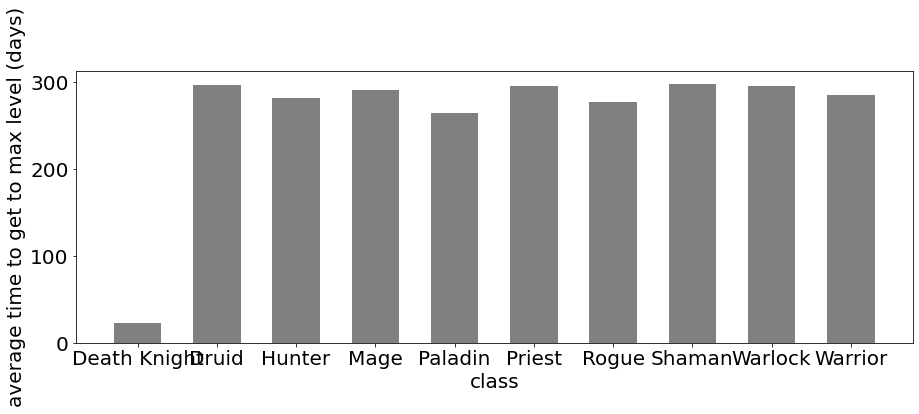

In [47]:
fig = plt.figure(figsize=(15,5))
plt.bar(class_time.index, class_time.values, color ='#808080', width = 0.6)
plt.xlabel("class")
plt.ylabel("average time to get to max level (days)")
# plt.title("Students enrolled in different courses")

##### Though it might sound silly, lets also find time taken to reach max level for different races.
##### the results will be interesting!

In [48]:
race_time = min_max.groupby(['race_x'])['time_taken'].mean()

Text(0, 0.5, 'average time to get to max level (days)')

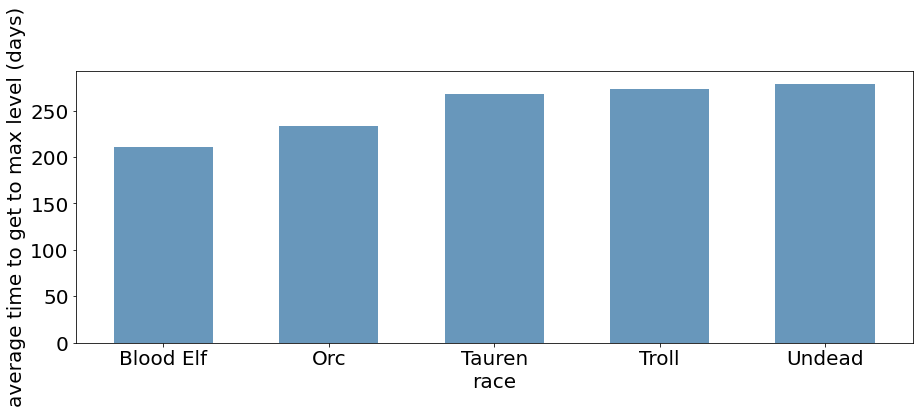

In [49]:
fig = plt.figure(figsize=(15,5))
plt.bar(race_time.index, race_time.values, color ='#6897bb', width = 0.6)
plt.xlabel("race")
plt.ylabel("average time to get to max level (days)")
# plt.title("Students enrolled in different courses")

In [50]:
# findings:
# obviously since DKs start their journey at lvl 55, they can reach 80 much faster than the other classes.
#paladind can also easily reach max with their AOE and heavy armour and healing abilities.
#Leveling is a lil bit tricky for dudus, priests and shamans probably cuz of the lack of AOEs and their healing specs (if they choose that branch).

# the strangest thingfor me is that Belfs and Orcs reach 80 faster! I absolutely have no idea! maybe cuz Belfs have
# paladins, orcs generally have more warriors or hunters and rogues !
# or maybe because they look aa lil bit more human and thus they keep you playing to max lvl !!! (orcs :D)
# I am just ranting, dont have a solid idea !!!

# Time Analysis

#### In the following we do a quick time analysis, the goal is to use ARIMA model to predict the number of players for a few months after the given time period.

In [51]:
len(df.char.unique())

37354

In [52]:
df.groupby('char')['timestamp'].value_counts()

char   timestamp          
2      2008-12-03 10:41:47    1
7      2008-01-15 21:47:09    1
       2008-01-15 21:56:54    1
       2008-01-15 22:07:23    1
       2008-01-15 22:17:08    1
                             ..
90577  2008-12-31 22:32:52    1
       2008-12-31 22:47:54    1
90578  2008-12-31 22:32:52    1
90579  2008-12-31 22:44:45    1
90580  2008-12-31 23:15:20    1
Name: timestamp, Length: 10823177, dtype: int64

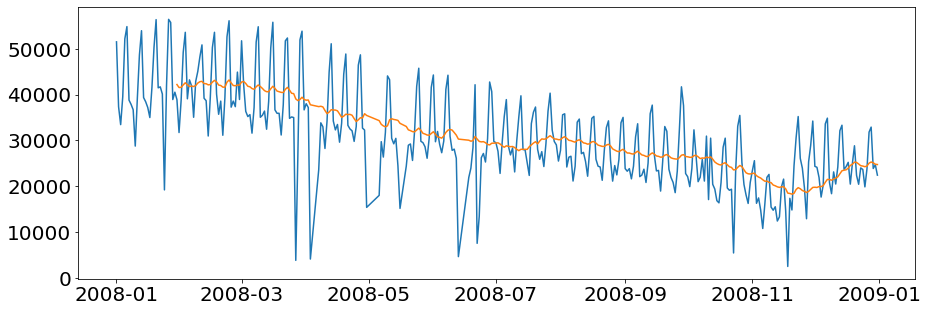

In [53]:
df['date'] = pd.DatetimeIndex(df['timestamp']).normalize()
time_df = df.groupby('date')['char'].count()
ts = pd.DataFrame(time_df)
fig = plt.figure(figsize = (15,5))
plt.plot(time_df)
plt.plot(ts['char'].rolling(30).mean())

In [54]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [55]:
# ts = ts.drop('First Difference', axis = 1, inplace = True)
ts

char
date             
2008-01-01  51539
2008-01-02  37371
2008-01-03  33463
2008-01-04  39555
2008-01-05  52201
...           ...
2008-12-27  31830
2008-12-28  32922
2008-12-29  23891
2008-12-30  24707
2008-12-31  22431

[352 rows x 1 columns]

In [56]:

adf_test(ts)

ADF Statistics: -2.025156841736541
p- value: 0.27565278081069716
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [57]:
# a function to add lags to time series
def lag_maker(ts, lags = 1):
    df = ts.copy()
    for i in range(1,lags+1):
        df['lag_{}'.format(i)] = ts.shift(i).values
#     deciding wether to fill or drop
#     df = df.fillna(0)
    df = df.dropna (axis = 0)
    return df

In [58]:
ts_1=lag_maker(ts)

In [59]:
ts_1['First Difference'] = ts_1['char'] - ts_1['lag_1']

In [60]:
adf_test(ts_1['First Difference'])

ADF Statistics: -21.798665719196926
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


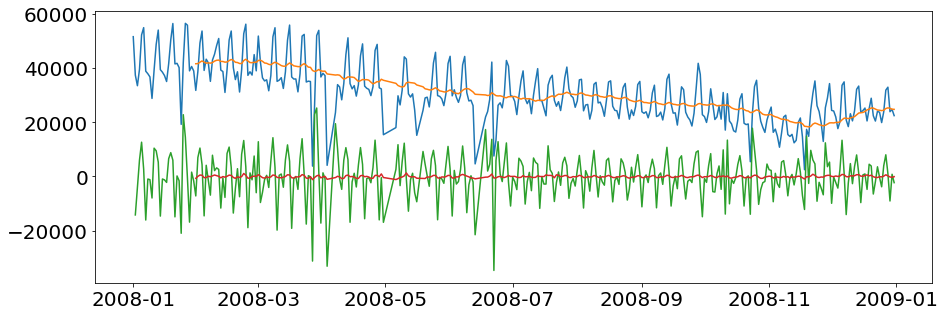

In [61]:
fig = plt.figure(figsize = (15,5))
plt.plot(time_df)
plt.plot(ts_1['char'].rolling(30).mean())
plt.plot(ts_1['First Difference'])
plt.plot(ts_1['First Difference'].rolling(30).mean())

##### getting order of ARIMA using ACF and PACF plots

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



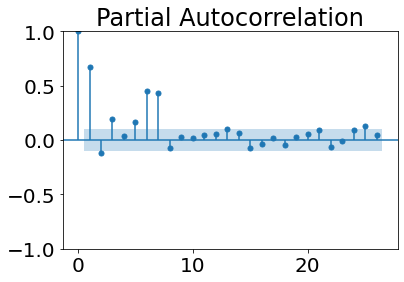

In [63]:
# we get value of p with this plot
pacf = plot_pacf(ts_1['char'].dropna())

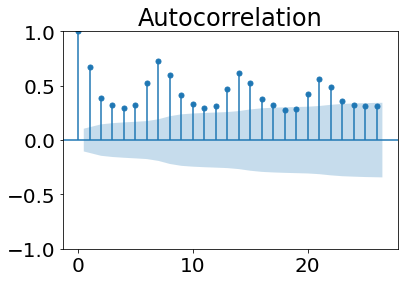

In [64]:
#we get value of q with this plot
acf = plot_acf(ts_1["char"].dropna())

In [65]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [66]:
from datetime import datetime,timedelta
train_dataset_start=datetime(2008,1,2)
train_dataset_end=datetime(2008,10,31)
test_dataset_end=datetime(2008,12,31)

In [67]:
train_data=ts_1[:train_dataset_end]
test_data=ts_1[train_dataset_end+timedelta(days=1):test_dataset_end]

In [68]:
##prediction
# pred_start_date=test_data.index[0]
# pred_end_date=test_data.index[-1]

In [69]:
model_ARIMA=ARIMA(train_data['char'],order=(7,1,17))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Pour

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   char   No. Observations:                  290
Model:                ARIMA(7, 1, 17)   Log Likelihood               -2921.535
Date:                Fri, 01 Jul 2022   AIC                           5893.070
Time:                        00:21:09   BIC                           5984.731
Sample:                             0   HQIC                          5929.798
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1982      0.224     -0.886      0.376      -0.637       0.240
ar.L2         -0.0606      0.214     -0.283      0.777      -0.480       0.358
ar.L3         -0.2818      0.201     -1.403      0.161      -0.675       0.112
ar.L4         -0.0170      0.218     -0.078      0.938      -0.445       0.411
ar.L5         -0.2802      0.185     -1.511      0.131      -0.643       0.083
ar.L6         -0.0888      0.221     -0.402      0.687      -0.521       0.344
ar.L7          0.8010      0.200      4.006      0.000       0.409       1.193
ma.L1         -0.3338      0.233     -1.433      0.152      -0.790       0.123
ma.L2         -0.4505      0.160     -2.808      0.005      -0.765      -0.136
ma.L3          0.0901      0.103      0.873      0.383      -0.112       0.292
ma.L4         -0.2941      0.111     -2.660      0.008      -0.511      -0.077
ma.L5          0.1408      0.132      1.063      0.288      -0.119       0.400
ma.L6          0.0103      0.124      0.083      0.934      -0.233       0.254
ma.L7         -0.5979      0.099     -6.070      0.000      -0.791      -0.405
ma.L8          0.3976      0.160      2.486      0.013       0.084       0.711
ma.L9          0.2453      0.126      1.942      0.052      -0.002       0.493
ma.L10        -0.0089      0.107     -0.083      0.934      -0.219       0.202
ma.L11        -0.0130      0.110     -0.118      0.906      -0.229       0.203
ma.L12         0.0666      0.092      0.723      0.470      -0.114       0.247
ma.L13        -0.0603      0.097     -0.621      0.535      -0.251       0.130
ma.L14        -0.2590      0.073     -3.548      0.000      -0.402      -0.116
ma.L15         0.0085      0.097      0.087      0.930      -0.182       0.199
ma.L16         0.0445      0.088      0.507      0.612      -0.127       0.216
ma.L17         0.1525      0.082      1.852      0.064      -0.009       0.314
sigma2      3.616e+07   3.44e-08   1.05e+15      0.000    3.62e+07    3.62e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):               312.08
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.96e+30. Standard errors may be unstable.
"""

In [70]:
train_data.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-05',
               '2008-01-06', '2008-01-07', '2008-01-08', '2008-01-09',
               '2008-01-10', '2008-01-11',
               ...
               '2008-10-22', '2008-10-23', '2008-10-24', '2008-10-25',
               '2008-10-26', '2008-10-27', '2008-10-28', '2008-10-29',
               '2008-10-30', '2008-10-31'],
              dtype='datetime64[ns]', name='date', length=290, freq=None)

In [71]:
# pred_start_date=test_data.index[0]
# pred_end_date=test_data.index[-1]
# print(pred_start_date)
# print(pred_end_date)
start = len(train_data)
end = len(train_data)+ len(test_data) -1
print(start, end)
# type(pred_start_date)

290 350


In [72]:
# pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
pred=model_Arima_fit.predict(start=start,end=end)
pred.index = test_data.index
residuals=test_data['char']-pred

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<AxesSubplot:xlabel='date'>

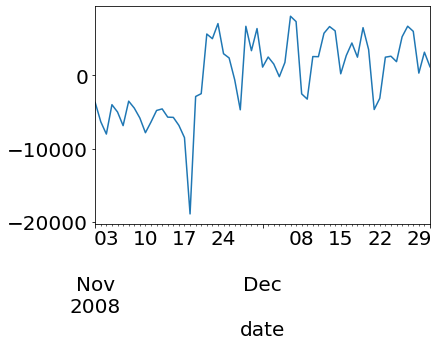

In [73]:
residuals.plot()

<AxesSubplot:xlabel='date'>

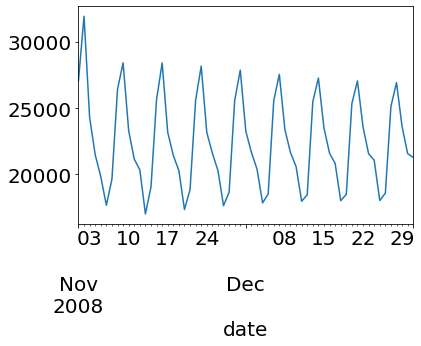

In [74]:
pred.plot()

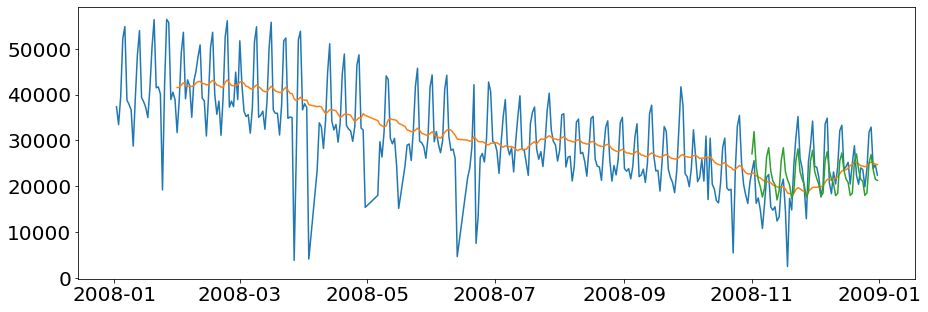

In [75]:
plt.figure(figsize=(15,5))
plt.plot(ts_1['char'])
plt.plot(ts_1['char'].rolling(30).mean())
plt.plot(pred)

#### SARIMAX

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

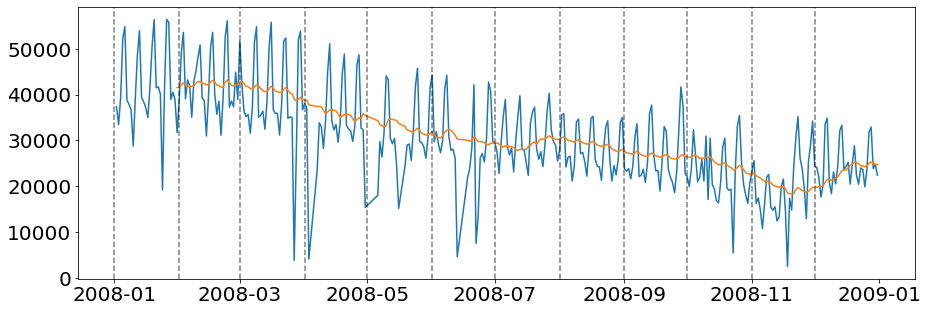

In [77]:
plt.figure(figsize=(15,5))
plt.plot(ts_1['char'])
plt.plot(ts_1['char'].rolling(30).mean())
for month in range (train_dataset_start.month, test_dataset_end.month+1):
    plt.axvline(pd.to_datetime('2008-' + str(month) + '-01'), color = 'k', linestyle = '--', alpha = 0.5)

In [78]:
order = (7,1,17)
sorder = (0,0,0,52)
model_SARIMA=SARIMAX(train_data['char'],order=(7,1,17),seasonal_order=(0,1,0,365))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning:

invalid value encountered in log

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                  char   No. Observations:                  290
Model:             SARIMAX(7, 1, 17)x(0, 1, [], 365)   Log Likelihood                   0.000
Date:                               Fri, 01 Jul 2022   AIC                             50.000
Time:                                       00:22:41   BIC                                nan
Sample:                                            0   HQIC                               nan
                                               - 290                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2              -0         -0        nan        nan           0          -0
ar.L3              -0         -0        nan        nan           0          -0
ar.L4               0         -0        nan        nan           0           0
ar.L5               0         -0        nan        nan           0           0
ar.L6               0         -0        nan        nan           0           0
ar.L7               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ma.L2               0         -0        nan        nan           0           0
ma.L3               0         -0        nan        nan           0           0
ma.L4               0         -0        nan        nan           0           0
ma.L5               0         -0        nan        nan           0           0
ma.L6               0         -0        nan        nan           0           0
ma.L7               0         -0        nan        nan           0           0
ma.L8               0         -0        nan        nan           0           0
ma.L9               0         -0        nan        nan           0           0
ma.L10              0         -0        nan        nan           0           0
ma.L11              0         -0        nan        nan           0           0
ma.L12              0         -0        nan        nan           0           0
ma.L13              0         -0        nan        nan           0           0
ma.L14              0         -0        nan        nan           0           0
ma.L15              0         -0        nan        nan           0           0
ma.L16              0         -0        nan        nan           0           0
ma.L17              0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [79]:
pred_2=model_SARIMA_fit.predict(start=start,end=end)
residuals=ts_1['First Difference']-pred_2
pred_2.index = test_data.index

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



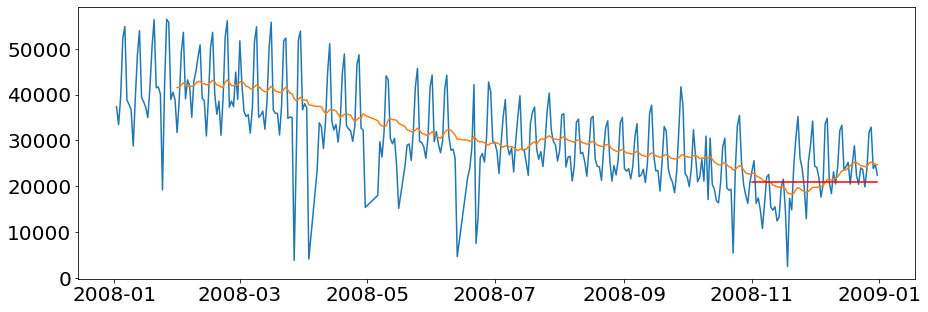

In [80]:
plt.figure(figsize=(15,5))
plt.plot(ts_1['char'])
plt.plot(ts_1['char'].rolling(30).mean())
plt.plot(pred_2, color ='r')
# plt.plot(pred, color = 'g')

##### As I have expected the dataset has some gaps in between, probably during server down dates, DDOS attacks, or patch updates. During these intervals, players could not login and generate data.
#### In the following we try to complete our data by finding the gaps within our dataset ,and then filling them with predictions made by training an ARIMA on the previous data.

In [81]:
ts_2 = ts_1.asfreq('D')
# ts_2

In [82]:
ts_null = ts_2[ts_2['char'].isnull()==True]
# ts_null

In [83]:
ts_2['2008-04-30':'2008-04-30']

char    lag_1  First Difference
date                                          
2008-04-30  15397.0  32288.0          -16891.0

In [84]:
# we can divide the null tsinto 4 sections. and then we use ARIMA to predict all 4 sections, impute the main 
# ts, and build a ts with no missing values.

##### first section (2008-04-04 ----> 2008-04-06)

In [85]:
train_1 = ts_2[:'2008-04-03']
test_1 = ts_2['2008-04-04':'2008-04-06']

In [86]:
model_1=ARIMA(train_1['char'],order=(7,1,17))
model_1_fit=model_1.fit()
pred_1 = model_1_fit.forecast(3)
pred_1.index = test_1.index

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



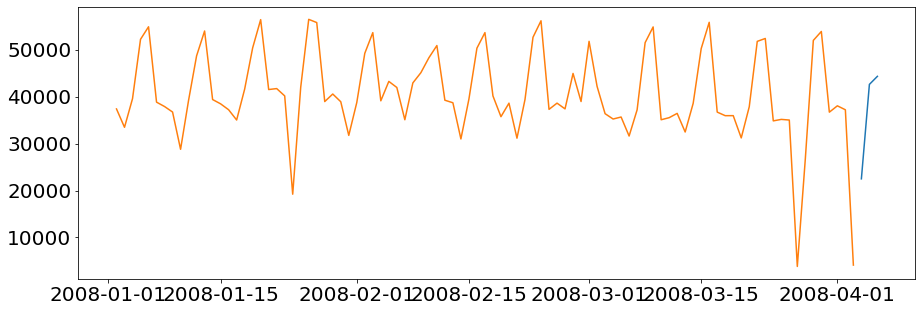

In [87]:
plt.figure(figsize=(15,5))
plt.plot(pred_1)
plt.plot(train_1.char)

In [88]:
pred_1m = pd.DataFrame(pred_1)
pred_1m.columns = ['char']

##### second section (2008-05-01 -------> 2008-05-05)

In [89]:
train_2 = pd.concat([train_1 ,pred_1m])
train_2_tail = ts_2['2008-04-07':'2008-04-30']
train_2_f = pd.concat([train_2, train_2_tail])
test_2 = ts_2['2008-05-01':'2008-05-05']

In [90]:
model_2=ARIMA(train_2_f['char'],order=(7,1,17))
model_2_fit=model_2.fit()
pred_2 = model_2_fit.forecast(5)
pred_2.index = test_2.index

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [91]:
pred_2m = pd.DataFrame(pred_2)
pred_2m.columns = ['char']

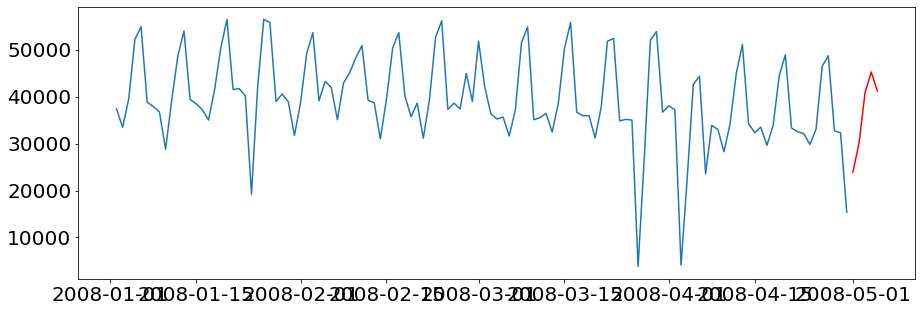

In [92]:
plt.figure(figsize=(15,5))
plt.plot(pred_2, color = 'r')
plt.plot(train_2_f.char)

##### third section (2008-05-17 -------> 2008-05-18)

In [93]:
train_3 = pd.concat([train_2_f ,pred_2m])
train_3_tail = ts_2['2008-05-06':'2008-05-16']
train_3_f = pd.concat([train_3, train_3_tail])
test_3 = ts_2['2008-05-17':'2008-05-18']

In [94]:
model_3=ARIMA(train_3_f['char'],order=(7,1,17))
model_3_fit=model_3.fit()
pred_3 = model_3_fit.forecast(2)
pred_3.index = test_3.index

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [95]:
pred_3m = pd.DataFrame(pred_3)
pred_3m.columns = ['char']

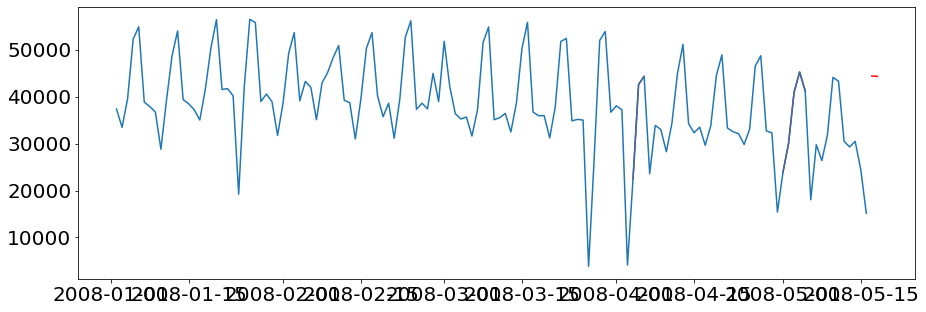

In [96]:
plt.figure(figsize=(15,5))
plt.plot(pred_2, color = 'r')
plt.plot(pred_1, color = 'r')
plt.plot(pred_3, color = 'r')
plt.plot(train_3_f.char)

##### fourth section (2008-06-14 -------> 2008-06-17)

In [97]:
train_4 = pd.concat([train_3_f ,pred_3m])
train_4_tail = ts_2['2008-05-19':'2008-06-13']
train_4_f = pd.concat([train_4, train_4_tail])
test_4 = ts_2['2008-06-14':'2008-06-17']

In [98]:
model_4=ARIMA(train_4_f['char'],order=(7,1,17))
model_4_fit=model_4.fit()
pred_4 = model_4_fit.forecast(4)
pred_4.index = test_4.index

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



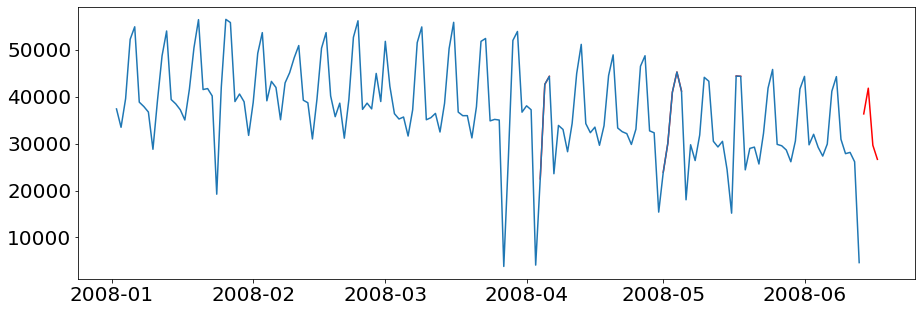

In [99]:
plt.figure(figsize=(15,5))
plt.plot(pred_3, color = 'r')
plt.plot(pred_1, color = 'r')
plt.plot(pred_4, color = 'r')
plt.plot(pred_2, color = 'r')
plt.plot(train_4_f.char)

In [100]:
pred_4m = pd.DataFrame(pred_4)
pred_4m.columns = ['char']

In [101]:
train_5 = pd.concat([train_4_f ,pred_4m])
train_5_tail = ts_2['2008-06-18':'2008-12-31']
filled_df = pd.concat([train_5, train_5_tail])
# test_4 = ts_2['2008-06-14':'2008-06-17']

In [102]:
ts_2

char    lag_1  First Difference
date                                          
2008-01-02  37371.0  51539.0          -14168.0
2008-01-03  33463.0  37371.0           -3908.0
2008-01-04  39555.0  33463.0            6092.0
2008-01-05  52201.0  39555.0           12646.0
2008-01-06  54868.0  52201.0            2667.0
...             ...      ...               ...
2008-12-27  31830.0  23829.0            8001.0
2008-12-28  32922.0  31830.0            1092.0
2008-12-29  23891.0  32922.0           -9031.0
2008-12-30  24707.0  23891.0             816.0
2008-12-31  22431.0  24707.0           -2276.0

[365 rows x 3 columns]

In [103]:
filled_df

char    lag_1  First Difference
date                                          
2008-01-02  37371.0  51539.0          -14168.0
2008-01-03  33463.0  37371.0           -3908.0
2008-01-04  39555.0  33463.0            6092.0
2008-01-05  52201.0  39555.0           12646.0
2008-01-06  54868.0  52201.0            2667.0
...             ...      ...               ...
2008-12-27  31830.0  23829.0            8001.0
2008-12-28  32922.0  31830.0            1092.0
2008-12-29  23891.0  32922.0           -9031.0
2008-12-30  24707.0  23891.0             816.0
2008-12-31  22431.0  24707.0           -2276.0

[365 rows x 3 columns]

<AxesSubplot:xlabel='date'>

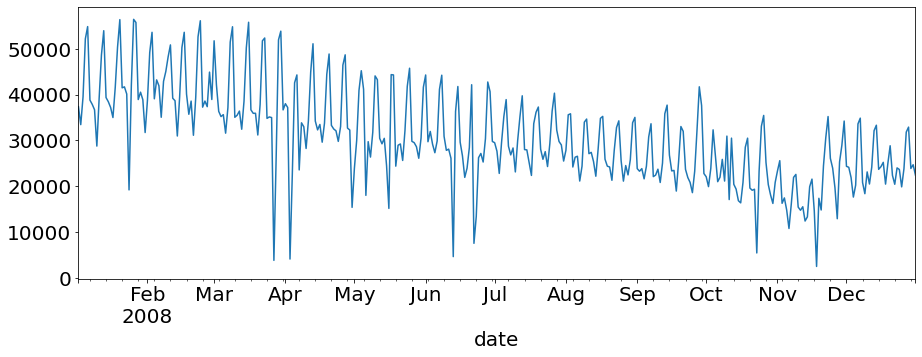

In [104]:
plt.figure(figsize=(15,5))
filled_df['char'].plot()

### forecasting future players 

#### now we can train an ARIMA on the complete data, to forecast activity of the players for a few months (we exclude acf/pacf steps as they are the same as the previous section).

In [105]:
train_ = filled_df['char']
datelist = pd.date_range(datetime(2009,1,1), periods=90).tolist()

In [106]:
model_=ARIMA(train_,order=(7,1,17))
model__fit=model_.fit()
pred_= model__fit.get_forecast(90)
fitted = model__fit.predict(start = datetime(2008,11,1), end = datetime(2008,12,31))
pred_.index = datelist

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Pouria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [107]:
yhat = pred_.predicted_mean
yhat_conf_int = pred_.conf_int(alpha=0.05)

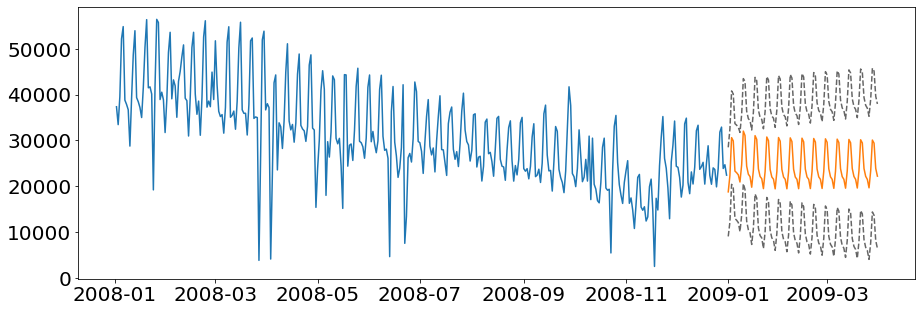

In [108]:
plt.figure(figsize=(15,5))
plt.plot(train_)
plt.plot(yhat_conf_int, linestyle='--', color = 'black', alpha = .6)
plt.plot(yhat)
# plt.plot(fitted, linestyle='-')